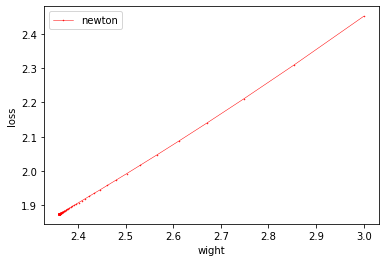

In [28]:
# 各モジュール
import numpy as np
import matplotlib.pyplot as plt

class Newton:
    def __init__(self, n, w, lamda, iteration):
        # parameter
        self.n         = n
        self.w         = w
        self.lamda     = lamda
        self.iteration = iteration
        
    def draw(self, w_stack, eval_stack):
            plt.plot(w_stack, eval_stack, 'ro-', linewidth=0.5, markersize=0.5, label='newton')
            plt.legend()
            plt.xlabel('wight')
            plt.ylabel('loss')

    def main(self):
        # noise
        omega = np.random.randn()
        noise = np.random.randn(self.n)
        # 2次元入出力データ
        x = np.random.randn(self.n, 2)
        y = 2 * (omega * x[:, 0] + x[:, 1] + noise > 0) - 1
        # 値格納用メモリ
        w_stack    = np.zeros(self.iteration)
        eval_stack = np.zeros(self.iteration)
        
        # main loop
        for t in range(self.iteration):
            # 事後確率
            posterior = 1 / (1 + np.exp(-y * (self.w * x[:, 0] + x[:, 1])))
            # 勾配方向(**a1) 評価関数をwについて一回微分したもの
            grad = 1 / self.n * np.sum((1 - posterior) * y * x[:, 0]) + 2 * self.lamda * self.w
            # ヘッセ行列(**a1) 評価関数をwについて二回微分したもの
            hess = 1 / self.n * np.sum(posterior * (1 - posterior) * x[:, 0] ** 2) + 2 * self.lamda
            # 評価関数の値(p22)
            J = 1 / self.n * np.sum(np.log(1 + np.exp(-y * (self.w + x[:, 0] + x[:, 1])))) + self.lamda * (self.w ** 2)
            # 値の格納
            w_stack[t]    = self.w
            eval_stack[t] = J
            # 重み更新のための勾配方向 d (p35)
            d = - grad / hess
            # step size
            s = 1.0 / np.sqrt(t + 10) 
            # 重み更新
            self.w  = self.w + s * d
        # draw graph
        self.draw(w_stack, eval_stack)
        
newton = Newton(100, 3, 0.1, 300)
newton.main()

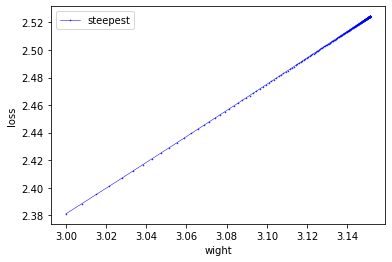

In [29]:
# 各モジュール
import numpy as np
import matplotlib.pyplot as plt

class Newton:
    def __init__(self, n, w, lamda, iteration,alpha):
        # parameter
        self.n         = n
        self.w         = w
        self.lamda     = lamda
        self.alpha     = alpha
        self.iteration = iteration
        
    def draw(self, w_stack, eval_stack):
            plt.plot(w_stack, eval_stack, 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
            plt.legend()
            plt.xlabel('wight')
            plt.ylabel('loss')

    def main(self):
        # noise
        omega = np.random.randn()
        noise = np.random.randn(self.n)
        # 2次元入出力データ
        x = np.random.randn(self.n, 2)
        y = 2 * (omega * x[:, 0] + x[:, 1] + noise > 0) - 1
        # 値格納用メモリ
        w_stack    = np.zeros(self.iteration)
        eval_stack = np.zeros(self.iteration)
        
        # main loop
        for t in range(self.iteration):
            # 事後確率
            posterior = 1 / (1 + np.exp(-y * (self.w * x[:, 0] + x[:, 1])))
            # 勾配方向(**a1) 評価関数をwについて一回微分したもの
            grad = 1 / self.n * np.sum((1 - posterior) * y * x[:, 0]) + 2 * self.lamda * self.w
            # 評価関数の値(p22)
            J = 1 / self.n * np.sum(np.log(1 + np.exp(-y * (self.w + x[:, 0] + x[:, 1])))) + self.lamda * (self.w ** 2)
            # 値の格納
            w_stack[t]    = self.w
            eval_stack[t] = J
            # step size
            s = 1.0 / np.sqrt(t + 10) 
            # 重み更新
            self.w  = self.w - self.alpha * s * grad
        # draw graph
        self.draw(w_stack, eval_stack)
    
newton = Newton(100, 3, 0.1, 300, 1)
newton.main()